In [26]:
import os
from datetime import datetime, time
from datetime import timezone

import pandas as pd

In [45]:
file_path = r"..\data"
file_name = r"Annual Smart Meter Consumption.csv"
solar_data = pd.read_csv(os.path.join(file_path, file_name))
solar_data

,Consumption (kWh),Start,End
0,0.507,2021-09-29T00:00:00+01:00,2021-09-29T00:30:00+01:00
1,1.318,2021-09-29T00:30:00+01:00,2021-09-29T01:00:00+01:00
2,1.779,2021-09-29T01:00:00+01:00,2021-09-29T01:30:00+01:00
3,1.273,2021-09-29T01:30:00+01:00,2021-09-29T02:00:00+01:00
4,1.309,2021-09-29T02:00:00+01:00,2021-09-29T02:30:00+01:00
...,...,...,...
17517,0.769,2022-09-28T22:30:00+01:00,2022-09-28T23:00:00+01:00
17518,1.349,2022-09-28T23:00:00+01:00,2022-09-28T23:30:00+01:00
17519,1.388,2022-09-28T23:30:00+01:00,2022-09-29T00:00:00+01:00
17520,1.400,2022-09-29T00:00:00+01:00,2022-09-29T00:30:00+01:00


In [30]:
# Start Date Cleaning
def datetime_cleaner(data):
    """
    """
    remove_spaces = [time.replace(" ", "") for time in data[" Start"]]
    iso_format = [datetime.fromisoformat(time).astimezone(timezone.utc) for time in remove_spaces]
    time = [time.time() for time in iso_format]
    data["iso_start"] = iso_format
    data["start_time"] = time
    
    remove_spaces = [time.replace(" ", "") for time in data[" End"]]
    iso_format = [datetime.fromisoformat(time).astimezone(timezone.utc) for time in remove_spaces]
    time = [time.time() for time in iso_format]
    data["iso_end"] = iso_format
    data["end_time"] = time

    data["time_delta"] = data["iso_end"] - data["iso_start"]
    
    return data

clean_data = datetime_cleaner(solar_data)
clean_data

,Consumption (kWh),Start,End,iso_start,iso_end,time_delta,Cost (pkWh),start_time,end_time
0,0.507,2021-09-29T00:00:00+01:00,2021-09-29T00:30:00+01:00,2021-09-28 23:00:00+00:00,2021-09-28 23:30:00+00:00,0 days 00:30:00,0,23:00:00,23:30:00
1,1.318,2021-09-29T00:30:00+01:00,2021-09-29T01:00:00+01:00,2021-09-28 23:30:00+00:00,2021-09-29 00:00:00+00:00,0 days 00:30:00,0,23:30:00,00:00:00
2,1.779,2021-09-29T01:00:00+01:00,2021-09-29T01:30:00+01:00,2021-09-29 00:00:00+00:00,2021-09-29 00:30:00+00:00,0 days 00:30:00,0,00:00:00,00:30:00
3,1.273,2021-09-29T01:30:00+01:00,2021-09-29T02:00:00+01:00,2021-09-29 00:30:00+00:00,2021-09-29 01:00:00+00:00,0 days 00:30:00,0,00:30:00,01:00:00
4,1.309,2021-09-29T02:00:00+01:00,2021-09-29T02:30:00+01:00,2021-09-29 01:00:00+00:00,2021-09-29 01:30:00+00:00,0 days 00:30:00,0,01:00:00,01:30:00
...,...,...,...,...,...,...,...,...,...
17517,0.769,2022-09-28T22:30:00+01:00,2022-09-28T23:00:00+01:00,2022-09-28 21:30:00+00:00,2022-09-28 22:00:00+00:00,0 days 00:30:00,0,21:30:00,22:00:00
17518,1.349,2022-09-28T23:00:00+01:00,2022-09-28T23:30:00+01:00,2022-09-28 22:00:00+00:00,2022-09-28 22:30:00+00:00,0 days 00:30:00,0,22:00:00,22:30:00
17519,1.388,2022-09-28T23:30:00+01:00,2022-09-29T00:00:00+01:00,2022-09-28 22:30:00+00:00,2022-09-28 23:00:00+00:00,0 days 00:30:00,0,22:30:00,23:00:00
17520,1.400,2022-09-29T00:00:00+01:00,2022-09-29T00:30:00+01:00,2022-09-28 23:00:00+00:00,2022-09-28 23:30:00+00:00,0 days 00:30:00,0,23:00:00,23:30:00


In [35]:
clean_data["Cost (pkWh)"] = 0

clean_data.loc[
    (clean_data["start_time"] >= time(5, 30))
    | (clean_data["start_time"] < time(23, 30)),
    "Cost (pkWh)"
] = 39.0

clean_data.loc[
    (clean_data["start_time"] >= time(23, 30))
    | (clean_data["start_time"] < time(5, 30)),
    "Cost (pkWh)"
] = 7.5

clean_data

,Consumption (kWh),Start,End,iso_start,iso_end,time_delta,Cost (pkWh),start_time,end_time
0,0.507,2021-09-29T00:00:00+01:00,2021-09-29T00:30:00+01:00,2021-09-28 23:00:00+00:00,2021-09-28 23:30:00+00:00,0 days 00:30:00,39.0,23:00:00,23:30:00
1,1.318,2021-09-29T00:30:00+01:00,2021-09-29T01:00:00+01:00,2021-09-28 23:30:00+00:00,2021-09-29 00:00:00+00:00,0 days 00:30:00,7.5,23:30:00,00:00:00
2,1.779,2021-09-29T01:00:00+01:00,2021-09-29T01:30:00+01:00,2021-09-29 00:00:00+00:00,2021-09-29 00:30:00+00:00,0 days 00:30:00,7.5,00:00:00,00:30:00
3,1.273,2021-09-29T01:30:00+01:00,2021-09-29T02:00:00+01:00,2021-09-29 00:30:00+00:00,2021-09-29 01:00:00+00:00,0 days 00:30:00,7.5,00:30:00,01:00:00
4,1.309,2021-09-29T02:00:00+01:00,2021-09-29T02:30:00+01:00,2021-09-29 01:00:00+00:00,2021-09-29 01:30:00+00:00,0 days 00:30:00,7.5,01:00:00,01:30:00
...,...,...,...,...,...,...,...,...,...
17517,0.769,2022-09-28T22:30:00+01:00,2022-09-28T23:00:00+01:00,2022-09-28 21:30:00+00:00,2022-09-28 22:00:00+00:00,0 days 00:30:00,39.0,21:30:00,22:00:00
17518,1.349,2022-09-28T23:00:00+01:00,2022-09-28T23:30:00+01:00,2022-09-28 22:00:00+00:00,2022-09-28 22:30:00+00:00,0 days 00:30:00,39.0,22:00:00,22:30:00
17519,1.388,2022-09-28T23:30:00+01:00,2022-09-29T00:00:00+01:00,2022-09-28 22:30:00+00:00,2022-09-28 23:00:00+00:00,0 days 00:30:00,39.0,22:30:00,23:00:00
17520,1.400,2022-09-29T00:00:00+01:00,2022-09-29T00:30:00+01:00,2022-09-28 23:00:00+00:00,2022-09-28 23:30:00+00:00,0 days 00:30:00,39.0,23:00:00,23:30:00


In [36]:
clean_data["30 min cost"] = clean_data["Cost (pkWh)"] * clean_data["Consumption (kWh)"]
clean_data

,Consumption (kWh),Start,End,iso_start,iso_end,time_delta,Cost (pkWh),start_time,end_time,30 min cost
0,0.507,2021-09-29T00:00:00+01:00,2021-09-29T00:30:00+01:00,2021-09-28 23:00:00+00:00,2021-09-28 23:30:00+00:00,0 days 00:30:00,39.0,23:00:00,23:30:00,19.7730
1,1.318,2021-09-29T00:30:00+01:00,2021-09-29T01:00:00+01:00,2021-09-28 23:30:00+00:00,2021-09-29 00:00:00+00:00,0 days 00:30:00,7.5,23:30:00,00:00:00,9.8850
2,1.779,2021-09-29T01:00:00+01:00,2021-09-29T01:30:00+01:00,2021-09-29 00:00:00+00:00,2021-09-29 00:30:00+00:00,0 days 00:30:00,7.5,00:00:00,00:30:00,13.3425
3,1.273,2021-09-29T01:30:00+01:00,2021-09-29T02:00:00+01:00,2021-09-29 00:30:00+00:00,2021-09-29 01:00:00+00:00,0 days 00:30:00,7.5,00:30:00,01:00:00,9.5475
4,1.309,2021-09-29T02:00:00+01:00,2021-09-29T02:30:00+01:00,2021-09-29 01:00:00+00:00,2021-09-29 01:30:00+00:00,0 days 00:30:00,7.5,01:00:00,01:30:00,9.8175
...,...,...,...,...,...,...,...,...,...,...
17517,0.769,2022-09-28T22:30:00+01:00,2022-09-28T23:00:00+01:00,2022-09-28 21:30:00+00:00,2022-09-28 22:00:00+00:00,0 days 00:30:00,39.0,21:30:00,22:00:00,29.9910
17518,1.349,2022-09-28T23:00:00+01:00,2022-09-28T23:30:00+01:00,2022-09-28 22:00:00+00:00,2022-09-28 22:30:00+00:00,0 days 00:30:00,39.0,22:00:00,22:30:00,52.6110
17519,1.388,2022-09-28T23:30:00+01:00,2022-09-29T00:00:00+01:00,2022-09-28 22:30:00+00:00,2022-09-28 23:00:00+00:00,0 days 00:30:00,39.0,22:30:00,23:00:00,54.1320
17520,1.400,2022-09-29T00:00:00+01:00,2022-09-29T00:30:00+01:00,2022-09-28 23:00:00+00:00,2022-09-28 23:30:00+00:00,0 days 00:30:00,39.0,23:00:00,23:30:00,54.6000


In [42]:
daily_cost = clean_data.groupby(clean_data["iso_start"].dt.date)[["30 min cost"]].sum()
daily_cost = daily_cost + 44.48
daily_cost

,30 min cost
iso_start,
2021-09-28,74.1380
2021-09-29,690.7970
2021-09-30,963.2090
2021-10-01,548.6765
2021-10-02,1130.4980
...,...
2022-09-24,554.1665
2022-09-25,1091.9300
2022-09-26,584.7650


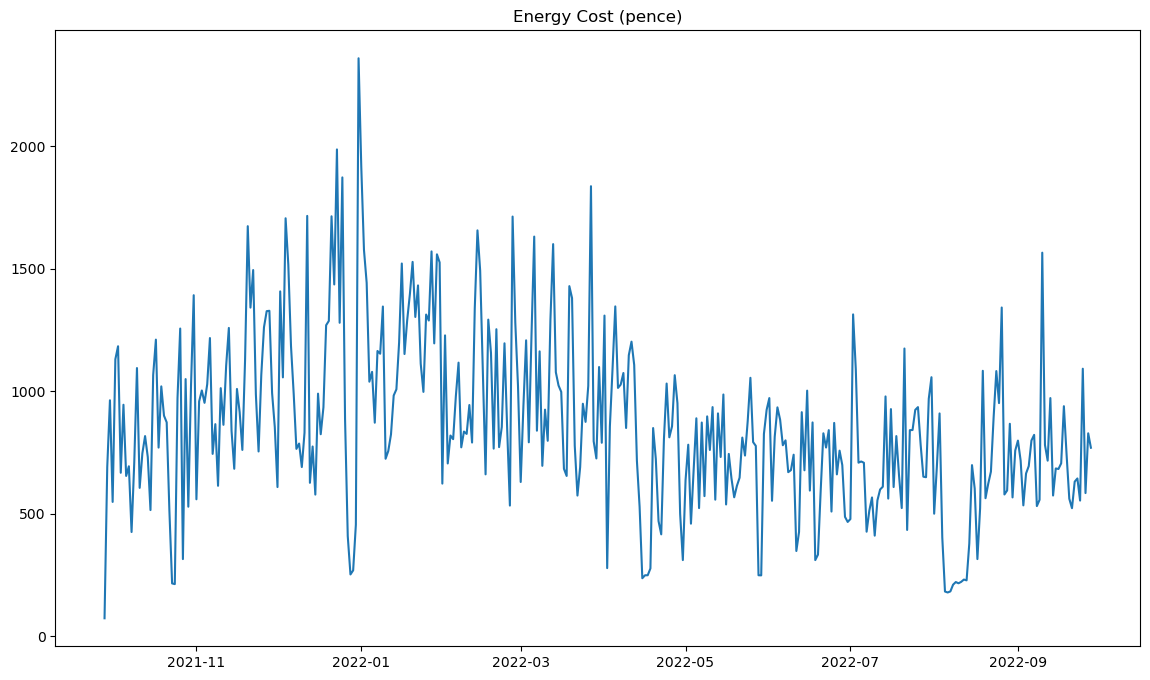

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.title("Energy Cost (pence)")
plt.plot(daily_cost.index, daily_cost["30 min cost"])
plt.show()

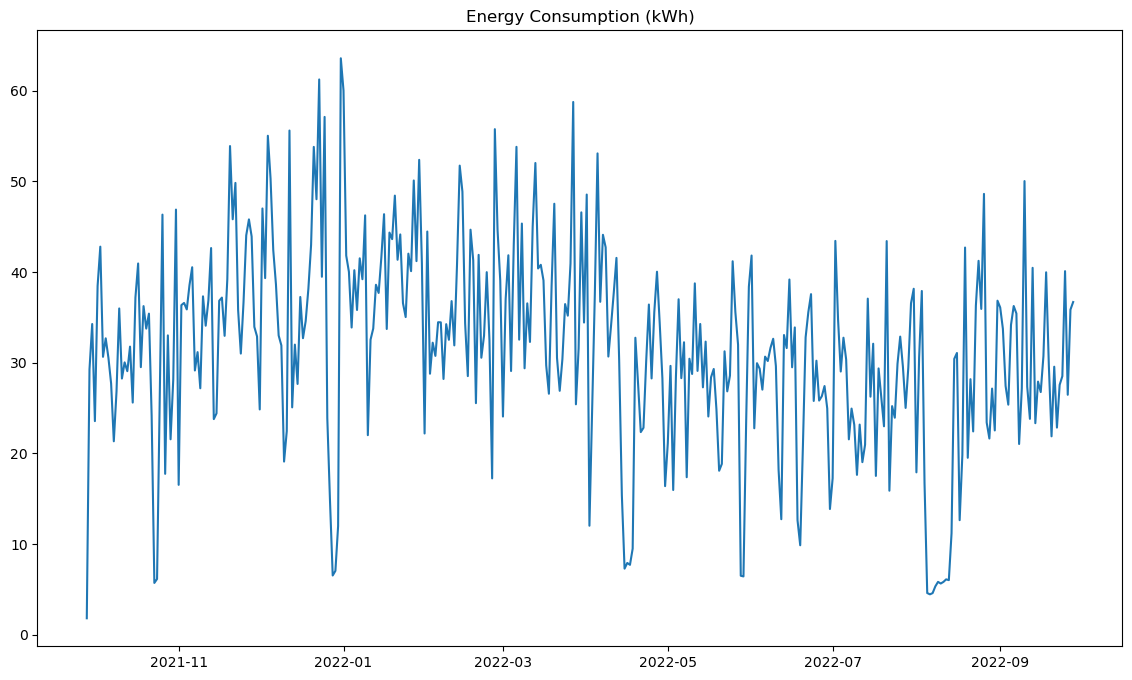

In [56]:
daily_consumption = clean_data.groupby(clean_data["iso_start"].dt.date)[["Consumption (kWh)"]].sum()

plt.figure(figsize=(14, 8))
plt.title("Energy Consumption (kWh)")
plt.plot(daily_consumption.index, daily_consumption["Consumption (kWh)"])
plt.show()